In [1]:
# import config
# config.Config.DISABLE_GPU = True
import global_functions
global_functions.on_start()

GPU NOT FOUND


In [2]:
import tensorflow as tf
print(tf.__version__)
#2.0.0

2.0.0


In [3]:
import importlib
import vizualizer, experiments , constants, datasets, models, predictors, training_data, training, reporter, excel_logger
importlib.reload(vizualizer)
importlib.reload(experiments)
importlib.reload(constants)
importlib.reload(datasets)
importlib.reload(models)
importlib.reload(predictors)
importlib.reload(training_data)
importlib.reload(training)
importlib.reload(reporter)
importlib.reload(excel_logger)
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# show the architecture for model
bigProvider = models.LargeModelBuilder.get_provider()
modelBig = bigProvider(datasets.FashionMnistDataset())
modelBig.autoencoder.summary()
modelBig.classifier.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        

Experiment type Experiment classifier solo
Model index:  1
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.01, validate=True)
Model name:  classifier
Stopped epoch:  21
Best epoch:  1
Value to monitor:  val_accuracy
Monitor best value:  0.4561
metric: accuracy
Values:  [0,33666667, 0,6066667, 0,71, 0,7183333, 0,74333334, 0,76, 0,7966667, 0,8066667, 0,8283333, 0,84166664, 0,89, 0,87666667, 0,885, 0,8883333, 0,89166665, 0,9166667, 0,93833333, 0,9316667, 0,925, 0,93666667, 0,94166666]
metric: val_accuracy
Values:  [0,4561, 0,421, 0,2983, 0,3072, 0,225, 0,1804, 0,1916, 0,2735, 0,2909, 0,1994, 0,1809, 0,1904, 0,2245, 0,2612, 0,2854, 0,2645, 0,1536, 0,1091, 0,1, 0,1043, 0,1633]


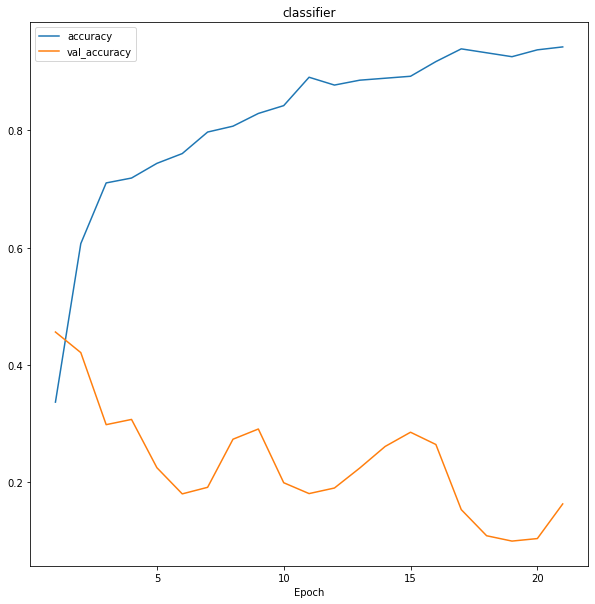

Experiment type Experiment classifier solo
Model index:  2
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.01, validate=True)
Model name:  classifier
Stopped epoch:  21
Best epoch:  1
Value to monitor:  val_accuracy
Monitor best value:  0.2675
metric: accuracy
Values:  [0,32333332, 0,595, 0,6666667, 0,74833333, 0,75166667, 0,79833335, 0,8, 0,8466667, 0,86333334, 0,88666666, 0,9066667, 0,905, 0,895, 0,92333335, 0,91, 0,9316667, 0,95, 0,92, 0,935, 0,9583333, 0,955]
metric: val_accuracy
Values:  [0,2675, 0,1002, 0,1, 0,1, 0,1306, 0,1, 0,1, 0,1445, 0,1767, 0,1975, 0,1998, 0,1887, 0,1162, 0,1, 0,1, 0,1, 0,1652, 0,1654, 0,1156, 0,1, 0,1]


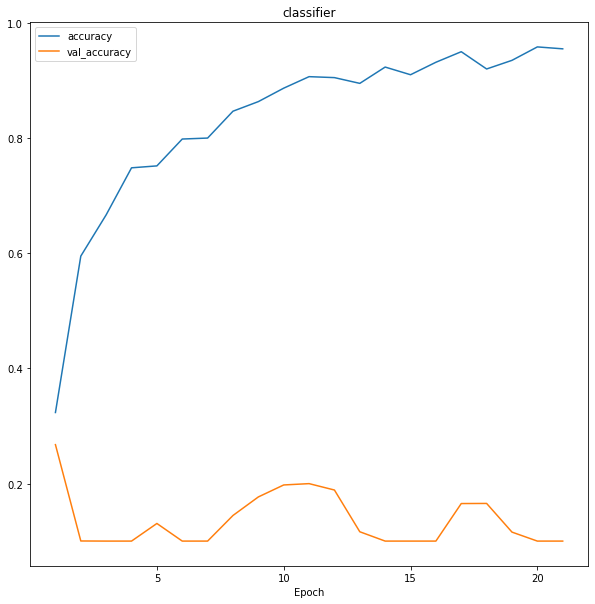

Experiment type Experiment classifier solo
Model index:  3
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.05, validate=True)
Model name:  classifier
Stopped epoch:  58
Best epoch:  38
Value to monitor:  val_accuracy
Monitor best value:  0.8755
metric: accuracy
Values:  [0,596, 0,7416667, 0,7723333, 0,802, 0,818, 0,84066665, 0,858, 0,85866666, 0,875, 0,88, 0,8886667, 0,8973333, 0,899, 0,903, 0,91466665, 0,931, 0,933, 0,9403333, 0,93266666, 0,939, 0,94133335, 0,94266665, 0,954, 0,95533335, 0,9536667, 0,96133333, 0,9583333, 0,9683333, 0,96666664, 0,962, 0,95966667, 0,96466666, 0,9673333, 0,96, 0,97433335, 0,9716667, 0,97366667, 0,97433335, 0,978, 0,9803333, 0,9763333, 0,974, 0,9776667, 0,97433335, 0,971, 0,986, 0,983, 0,9853333, 0,983, 0,9853333, 0,984, 0,984, 0,9853333, 0,9

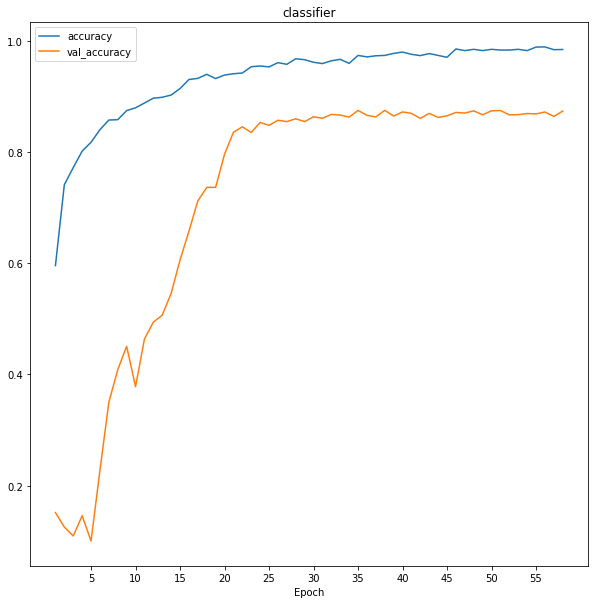

Experiment type Experiment classifier solo
Model index:  4
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.05, validate=True)
Model name:  classifier
Stopped epoch:  74
Best epoch:  54
Value to monitor:  val_accuracy
Monitor best value:  0.8822
metric: accuracy
Values:  [0,542, 0,72466666, 0,7673333, 0,80266666, 0,819, 0,834, 0,8513333, 0,86766666, 0,86766666, 0,888, 0,8973333, 0,89966667, 0,9023333, 0,915, 0,91566664, 0,92333335, 0,925, 0,931, 0,938, 0,94166666, 0,942, 0,95233333, 0,954, 0,948, 0,94233334, 0,9546667, 0,965, 0,96433336, 0,9626667, 0,96533334, 0,9636667, 0,96666664, 0,9713333, 0,97366667, 0,966, 0,9716667, 0,97533333, 0,97533333, 0,97066665, 0,972, 0,966, 0,97366667, 0,97033334, 0,9773333, 0,9803333, 0,982, 0,9773333, 0,978, 0,98066664, 0,9813333, 0,9833333

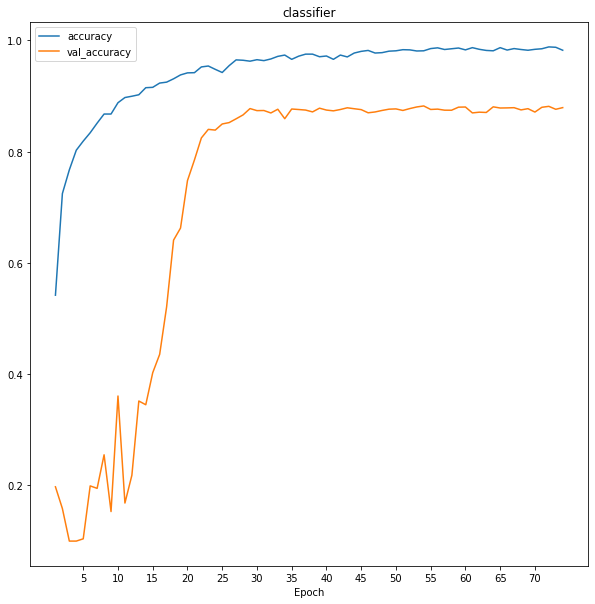

Experiment type Experiment classifier solo
Model index:  5
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.1, validate=True)
Model name:  classifier
Stopped epoch:  60
Best epoch:  40
Value to monitor:  val_accuracy
Monitor best value:  0.8958
metric: accuracy
Values:  [0,647, 0,778, 0,81383336, 0,8348333, 0,8498333, 0,863, 0,8731667, 0,8821667, 0,8925, 0,89633334, 0,912, 0,9138333, 0,918, 0,9305, 0,9253333, 0,93233335, 0,93916667, 0,9425, 0,945, 0,94883335, 0,951, 0,9505, 0,958, 0,9558333, 0,96283334, 0,962, 0,9673333, 0,96283334, 0,9725, 0,97283334, 0,9741667, 0,9676667, 0,96816665, 0,9751667, 0,97716665, 0,97566664, 0,978, 0,9776667, 0,9763333, 0,97866666, 0,979, 0,97833335, 0,98066664, 0,9815, 0,9838333, 0,98333335, 0,981, 0,98183334, 0,98216665, 0,98233336, 0,97833335

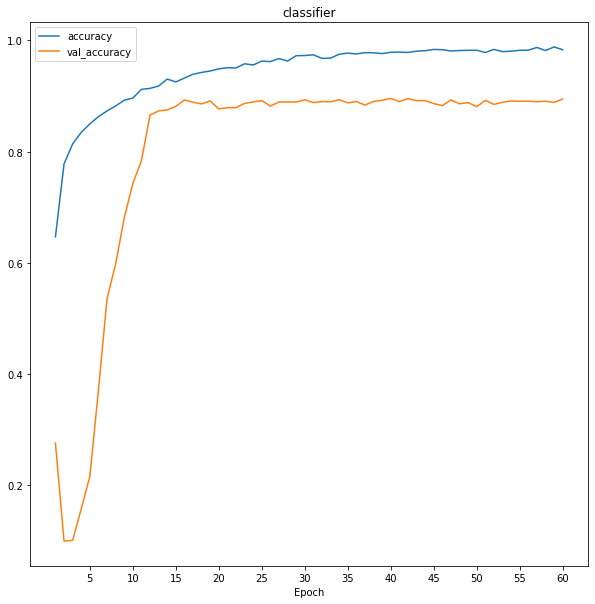

Experiment type Experiment classifier solo
Model index:  6
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.1, validate=True)
Model name:  classifier
Stopped epoch:  91
Best epoch:  71
Value to monitor:  val_accuracy
Monitor best value:  0.8979
metric: accuracy
Values:  [0,6228333, 0,7618333, 0,80733335, 0,82, 0,8438333, 0,8535, 0,8678333, 0,87916666, 0,8806667, 0,8925, 0,8998333, 0,90783334, 0,91216666, 0,9155, 0,9206667, 0,9315, 0,9281667, 0,9368333, 0,93633336, 0,9456667, 0,94116664, 0,9486667, 0,949, 0,9543333, 0,9511667, 0,9548333, 0,9625, 0,96133333, 0,961, 0,96183336, 0,9648333, 0,96716666, 0,9686667, 0,9688333, 0,9713333, 0,9715, 0,975, 0,9765, 0,97783333, 0,9685, 0,9738333, 0,97966665, 0,9765, 0,9775, 0,98116666, 0,98066664, 0,9816667, 0,97716665, 0,98066664, 0,979

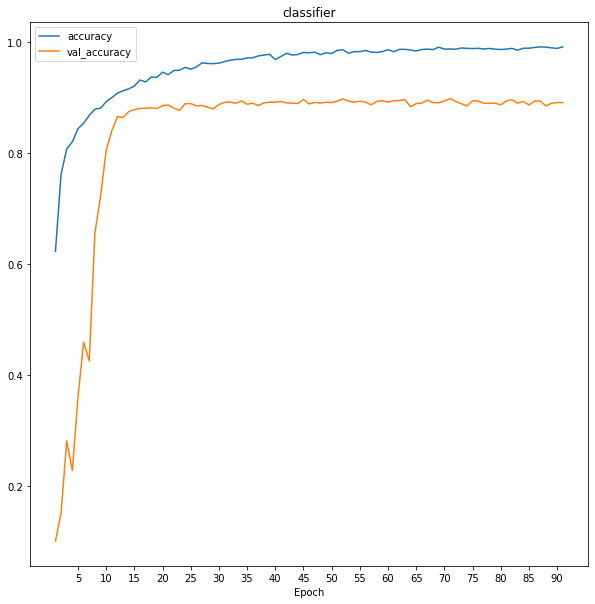

Experiment type Experiment classifier solo
Model index:  7
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.25, validate=True)
Model name:  classifier
Stopped epoch:  43
Best epoch:  23
Value to monitor:  val_accuracy
Monitor best value:  0.9155
metric: accuracy
Values:  [0,7055333, 0,81306666, 0,8387333, 0,8563333, 0,8670667, 0,878, 0,8878, 0,8958, 0,90073335, 0,9069333, 0,909, 0,91693336, 0,9248667, 0,92826664, 0,93453336, 0,9360667, 0,93686664, 0,9434, 0,945, 0,94893336, 0,9492667, 0,95206666, 0,94766665, 0,95606667, 0,9586, 0,9587333, 0,95966667, 0,9605333, 0,9602, 0,96433336, 0,9677333, 0,96846664, 0,96653336, 0,9713333, 0,9696, 0,96973336, 0,9749333, 0,9736, 0,97386664, 0,9734667, 0,97606665, 0,9748667, 0,977]
metric: val_accuracy
Values:  [0,1, 0,3469, 0,6834, 0,8377

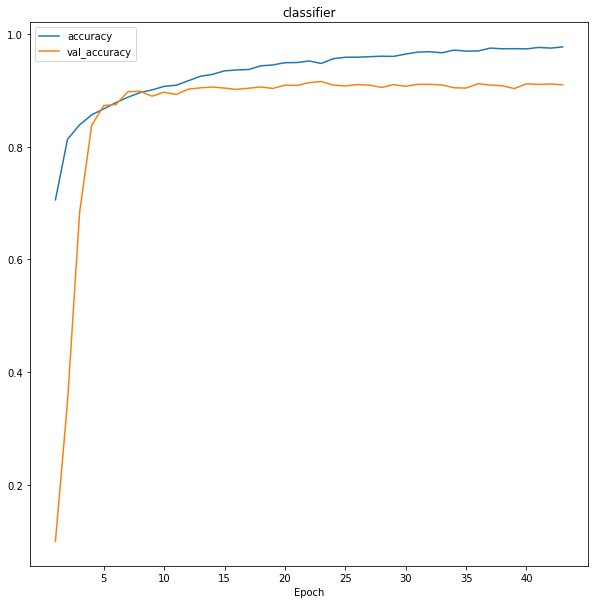

Experiment type Experiment classifier solo
Model index:  8
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.25, validate=True)
Model name:  classifier
Stopped epoch:  59
Best epoch:  39
Value to monitor:  val_accuracy
Monitor best value:  0.916
metric: accuracy
Values:  [0,7064667, 0,79946667, 0,82986665, 0,854, 0,86686665, 0,8786, 0,88566667, 0,89593333, 0,8982667, 0,9076667, 0,91573334, 0,9202, 0,9224, 0,92793334, 0,9308, 0,9324667, 0,93766665, 0,9410667, 0,94553334, 0,9476, 0,94993335, 0,95126665, 0,9518667, 0,9546667, 0,9594667, 0,95806664, 0,96146667, 0,9645333, 0,96346664, 0,9673333, 0,968, 0,9677333, 0,9645333, 0,9688, 0,96886665, 0,97073334, 0,9719333, 0,9734667, 0,9722, 0,9755333, 0,97386664, 0,9763333, 0,9755333, 0,9767333, 0,97713333, 0,9774, 0,97826666, 0,979933

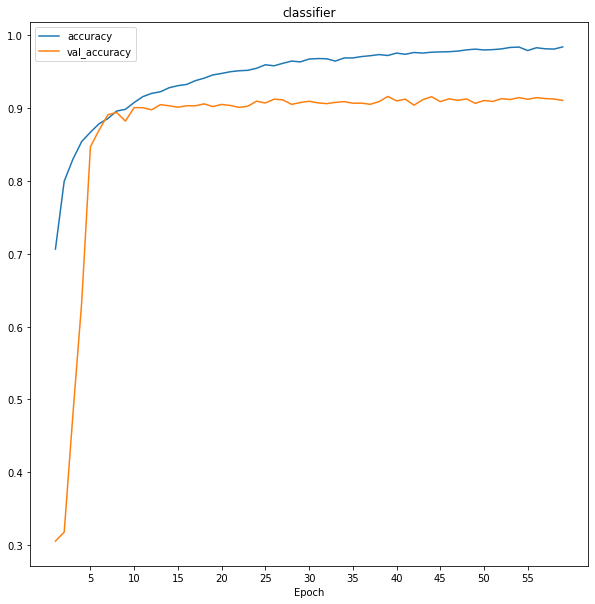

Experiment type Experiment classifier solo
Model index:  9
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.5, validate=True)
Model name:  classifier
Stopped epoch:  81
Best epoch:  61
Value to monitor:  val_accuracy
Monitor best value:  0.9269
metric: accuracy
Values:  [0,7668333, 0,8461667, 0,86983335, 0,8822333, 0,8910667, 0,9002, 0,91036665, 0,9127, 0,9181333, 0,92216665, 0,9278333, 0,9300333, 0,9328, 0,9368333, 0,93803334, 0,9426, 0,94266665, 0,9443667, 0,94886667, 0,9503667, 0,95516664, 0,9547, 0,95606667, 0,9582, 0,958, 0,96066666, 0,9629667, 0,96423334, 0,96243334, 0,9679667, 0,9654, 0,96723336, 0,96966666, 0,9703, 0,9696, 0,9702333, 0,9683333, 0,9702333, 0,97333336, 0,9724, 0,97356665, 0,9759, 0,9759, 0,9763, 0,97756666, 0,97496665, 0,97616667, 0,9784333, 0,9775, 0

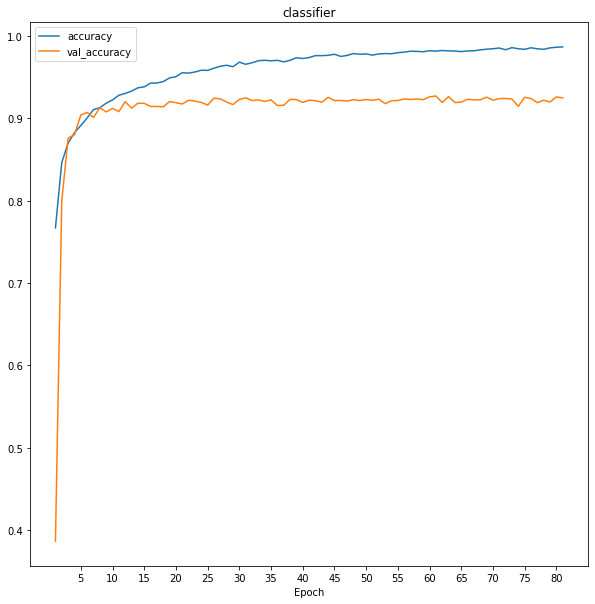

Experiment type Experiment classifier solo
Model index:  10
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=0.5, validate=True)
Model name:  classifier
Stopped epoch:  81
Best epoch:  61
Value to monitor:  val_accuracy
Monitor best value:  0.926
metric: accuracy
Values:  [0,76066667, 0,84323335, 0,8691, 0,8818333, 0,8929333, 0,9023, 0,9085, 0,91476667, 0,92036664, 0,9244, 0,9291, 0,93123335, 0,9355, 0,9382667, 0,9399, 0,94276667, 0,9461333, 0,94813335, 0,9518333, 0,9532667, 0,9547, 0,95573336, 0,9594333, 0,9583, 0,9591, 0,96286666, 0,9636, 0,9658667, 0,9667, 0,9655, 0,9658, 0,9677333, 0,9712, 0,96926665, 0,97076666, 0,9722, 0,9724333, 0,9719333, 0,97356665, 0,9723333, 0,97323334, 0,97426665, 0,9737, 0,97546667, 0,9774333, 0,97636664, 0,9795333, 0,9786, 0,97786665, 0,97783333

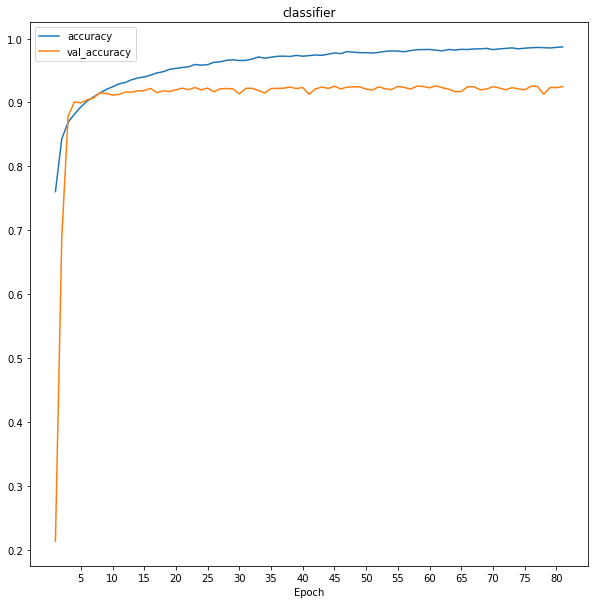

Experiment type Experiment classifier solo
Model index:  11
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=1, validate=True)
Model name:  classifier
Stopped epoch:  66
Best epoch:  46
Value to monitor:  val_accuracy
Monitor best value:  0.9364
metric: accuracy
Values:  [0,8043, 0,87053335, 0,89105, 0,9033, 0,91223335, 0,9167167, 0,92165, 0,92548335, 0,93105, 0,9338167, 0,93755, 0,9394, 0,9422, 0,94371665, 0,9469333, 0,94748336, 0,9496, 0,9533167, 0,9542, 0,95498335, 0,95585, 0,95806664, 0,95966667, 0,96035, 0,9623167, 0,9622333, 0,96318334, 0,9647167, 0,96445, 0,9662167, 0,96845, 0,96886665, 0,96925, 0,96886665, 0,9703, 0,97096664, 0,97138333, 0,97146666, 0,97248334, 0,97171664, 0,97263336, 0,97435, 0,9741333, 0,9748667, 0,97538334, 0,9761, 0,97671664, 0,9765667, 0,97683334

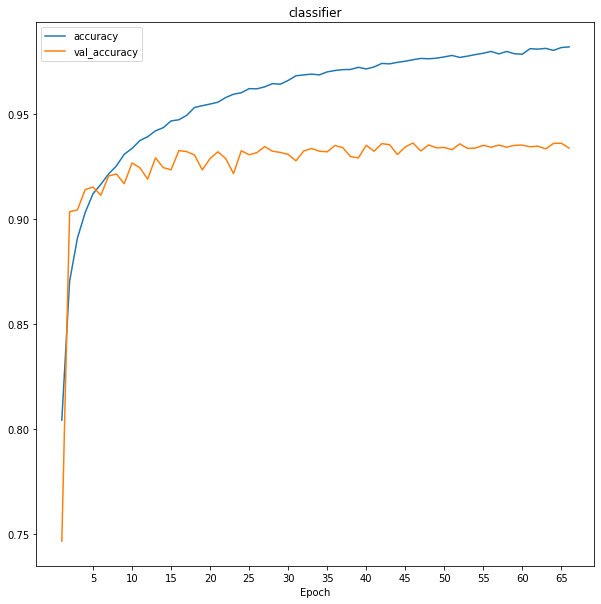

Experiment type Experiment classifier solo
Model index:  12
Parameters:  BasicTrainParametersClassifier(autoencoder_layers_trainable_during_classifier_training=True, batch_size=128, epochs=100, log_path=./output_dir/classifier_encoder_layers_on_bmp_fm.json, min_delta=1e-06, patience=20, save_weights=True, train_data_rate=1, validate=True)
Model name:  classifier
Stopped epoch:  68
Best epoch:  48
Value to monitor:  val_accuracy
Monitor best value:  0.9373
metric: accuracy
Values:  [0,8060167, 0,87093335, 0,8882333, 0,9008, 0,9107, 0,91581666, 0,9220333, 0,92445, 0,9270333, 0,9317667, 0,93615, 0,93736666, 0,9417, 0,9439167, 0,946, 0,94715, 0,9501167, 0,9505, 0,95213336, 0,95421666, 0,95596665, 0,9576, 0,95706666, 0,9597833, 0,95991665, 0,96078336, 0,9634, 0,96363336, 0,9642, 0,9641333, 0,9662, 0,9668667, 0,96745, 0,96805, 0,96905, 0,96995, 0,97008336, 0,96945, 0,9701167, 0,97173333, 0,97248334, 0,97315, 0,9736, 0,9738333, 0,97355, 0,9738167, 0,97615, 0,97515, 0,97601664, 0,9755833, 0,97

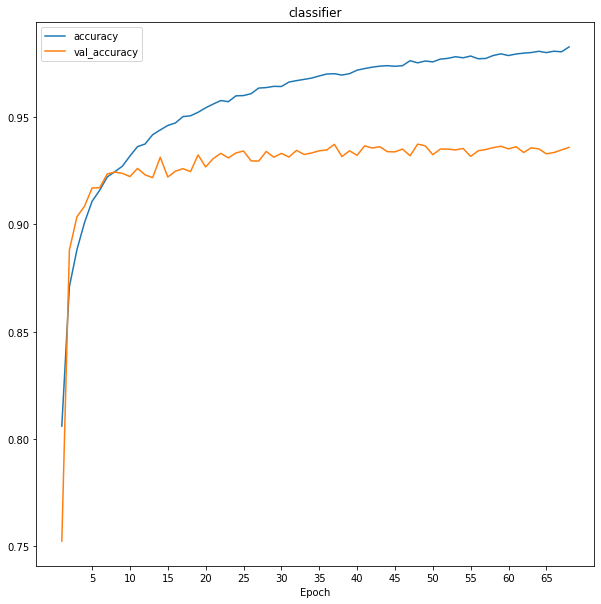

In [5]:
# shows how to load results of trained experiments and vizualize it
results = experiments.ExperimentBase.load_experiment_results(
     constants.ExperimentsPaths.FashionMnist.BasicModelBuilder.CLASSIFIER_EN_LAYERS_ON, True)
experiments.ExperimentBase.sort_results_ascending_by_train_rate(results)

metrics = [ constants.Metrics.ACCURACY]

params = vizualizer.VizualizeParams(0, 150, 5,False, False, metrics)
vizualizer.Vizualizer.vizualize([result.train_history for result in results], params)

In [6]:
# instantiate trained model with weights after training
experiment = results[-1].experiment
trained_models_classifier = experiment.model_provider()
trained_models_classifier

Models(autoencoder=<tensorflow.python.keras.engine.training.Model object at 0x133b81da0>, classifier=<tensorflow.python.keras.engine.training.Model object at 0x150f31fd0>, auto_classifier=<tensorflow.python.keras.engine.training.Model object at 0x132b542e8>)

In [7]:
# evaluate dataset
accuracy = experiments.ExperimentClassifier.evaluate_on_test(datasets.FashionMnistDataset(), trained_models_classifier)
accuracy

10000/1 - 8s - loss: 0.2199 - accuracy: 0.9373
[0.3163597182546393, 0.9373]


0.9373

In [8]:
# predict
predicted = experiments.ExperimentClassifier.predict_test(datasets.FashionMnistDataset(), trained_models_classifier)
# predicted = np.max(predicted, axis = 1)
predicted

10000/1 - 8s
Correct: 9373


array([[8.2218581e-30, 0.0000000e+00, 0.0000000e+00, ..., 3.2170871e-22,
        1.1508639e-33, 1.0000000e+00],
       [6.6312407e-12, 1.9179615e-25, 1.0000000e+00, ..., 1.1143024e-34,
        2.8020108e-17, 8.6007825e-27],
       [1.1562830e-37, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0107661e-36, 0.0000000e+00],
       ...,
       [3.1482996e-29, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.2761163e-32, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        6.5602120e-31, 0.0000000e+00],
       [3.8154705e-15, 6.3649146e-17, 7.8058889e-19, ..., 9.1969350e-06,
        1.1141155e-12, 6.8133298e-11]], dtype=float32)

In [9]:
# load autoencoder
results = experiments.ExperimentBase.load_experiment_results(
     constants.ExperimentsPaths.FashionMnist.BasicModelBuilder.AUTOENCODER, True)
experiments.ExperimentBase.sort_results_ascending_by_train_rate(results)
experiment = results[-1].experiment
trained_models_autoencoder = experiment.model_provider()
trained_models_autoencoder

Models(autoencoder=<tensorflow.python.keras.engine.training.Model object at 0x15132c668>, classifier=<tensorflow.python.keras.engine.training.Model object at 0x1549295c0>, auto_classifier=<tensorflow.python.keras.engine.training.Model object at 0x14ca943c8>)

In [11]:
# evaluate autoencoder
experiments.ExperimentAutoencoder.evaluate_on_test(datasets.FashionMnistDataset(), trained_models_autoencoder)

10000/1 - 9s - loss: 0.2293
0.24595334553718567


0.24595334553718567

10000/1 - 10s


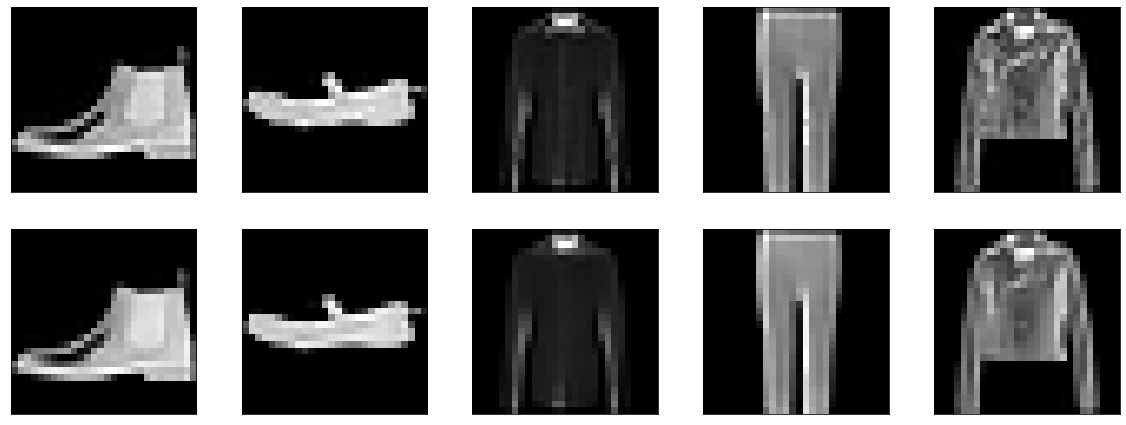

In [12]:
# predict and show autoencoder results
predicted = experiments.ExperimentAutoencoder.predict_test(datasets.FashionMnistDataset(), trained_models_autoencoder)

plot_params = vizualizer.PlotParams(22, (20,7.5), False)
vizualizer.Vizualizer.show_random_autoencoder_images(datasets.FashionMnistDataset(), datasets.FashionMnistDataset().get_test_images(), predicted, 5, plot_params, 6 )

In [ ]:
# training defined in class
training.TrainingFashionMnist.classifier(True)


In [ ]:
# training with concrete parameters
experiment_results = []
autoencoder_layers_trainable_during_classification_training = True
for rate in [0.01, 0.05, 0.1, 0.25, 0.5, 1]:
    exp = experiments.ExperimentClassifier(datasets.FashionMnistDataset,
                                       models.LargeModelBuilder.get_provider(),
                                       training_data.BasicTrainingDataGeneratorClassifier())
    result = exp.train(training_data.BasicTrainParametersClassifier(100, 128, 20, True, rate, 1e-6,
                                                                            autoencoder_layers_trainable_during_classification_training,
                                                                            None,
                                                                            False)
                               )
    experiment_results.append(result)

In [ ]:
# reporting experiment results

path = 'report_example.xlsx'

import os
if os.path.exists(path):
    os.remove(path)
excel_logger.ExcelLogger.append_to_workbook(["BasicModelBuilder Fashion mnist"], path)

ROOT_PATH = constants.ExperimentsPaths.FashionMnist.BasicModelBuilder

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "1. Autoenkóder")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.CLASSIFIER_EN_LAYERS_ON, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "2. Klasifikátor - vrstvy enkódera trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.CLASSIFIER_EN_LAYERS_OFF, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "3. Klasifikátor - vrstvy enkódera nie sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER1_CLASSIFIER1_AUTO_L_ON, True)
results.sort(key= lambda result: result.train_history.train_parameters.train_parameters_classifier.train_data_rate)
reporter.Reporter.create_report(results, path, "4.Autoenkóder a klasifikátor striedavo - vrstvy enkódera sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER1_CLASSIFIER1_AUTO_L_OFF, True)
results.sort(key= lambda result: result.train_history.train_parameters.train_parameters_classifier.train_data_rate)
reporter.Reporter.create_report(results, path, "5.Autoenkóder a klasifikátor striedavo - vrstvy enkódera nie sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER_TRAINED_CLASSIFIER_AUTO_L_ON, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "6. Autoenkóder natrénovaný a dotrénovanie klasifikátora - vrstvy enkódera sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER_TRAINED_CLASSIFIER_AUTO_L_OFF, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "7. Autoenkóder natrénovaný a dotrénovanie klasifikátora - vrstvy enkódera nie sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTO_CLASSIFIER_1to2, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "8. Autoklasifikátor 1A k 2KL")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTO_CLASSIFIER_1to1, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "8. Autoklasifikátor 1A k 1KL")

excel_logger.ExcelLogger.append_to_workbook(["LargeModelBuilder Fashion mnist"], path)
ROOT_PATH = constants.ExperimentsPaths.FashionMnist.LargeModelBuilder

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "1. Autoenkóder")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.CLASSIFIER_EN_LAYERS_ON, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "2. Klasifikátor - vrstvy enkódera trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.CLASSIFIER_EN_LAYERS_OFF, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "3. Klasifikátor - vrstvy enkódera nie sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER1_CLASSIFIER1_AUTO_L_ON, True)
results.sort(key= lambda result: result.train_history.train_parameters.train_parameters_classifier.train_data_rate)
reporter.Reporter.create_report(results, path, "4.Autoenkóder a klasifikátor striedavo - vrstvy enkódera sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER1_CLASSIFIER1_AUTO_L_OFF, True)
results.sort(key= lambda result: result.train_history.train_parameters.train_parameters_classifier.train_data_rate)
reporter.Reporter.create_report(results, path, "5.Autoenkóder a klasifikátor striedavo - vrstvy enkódera nie sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER_TRAINED_CLASSIFIER_AUTO_L_ON, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "6. Autoenkóder natrénovaný a dotrénovanie klasifikátora - vrstvy enkódera sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER_TRAINED_CLASSIFIER_AUTO_L_OFF, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "7. Autoenkóder natrénovaný a dotrénovanie klasifikátora - vrstvy enkódera nie sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTO_CLASSIFIER_1to2, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "8. Autoklasifikátor 1A k 2KL")

excel_logger.ExcelLogger.append_to_workbook(["BasicModelBuilderWithAveragePoolingWithoutDenseBuilder Fashion mnist"], path)

ROOT_PATH = constants.ExperimentsPaths.FashionMnist.BasicModelBuilderWithAveragePoolingWithoutDenseBuilder

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.CLASSIFIER_EN_LAYERS_ON, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "2. Klasifikátor - vrstvy enkódera trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.CLASSIFIER_EN_LAYERS_OFF, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "3. Klasifikátor - vrstvy enkódera nie sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER1_CLASSIFIER1_AUTO_L_ON, True)
results.sort(key= lambda result: result.train_history.train_parameters.train_parameters_classifier.train_data_rate)
reporter.Reporter.create_report(results, path, "4.Autoenkóder a klasifikátor striedavo - vrstvy enkódera sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER1_CLASSIFIER1_AUTO_L_OFF, True)
results.sort(key= lambda result: result.train_history.train_parameters.train_parameters_classifier.train_data_rate)
reporter.Reporter.create_report(results, path, "5.Autoenkóder a klasifikátor striedavo - vrstvy enkódera nie sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER_TRAINED_CLASSIFIER_AUTO_L_ON, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "6. Autoenkóder natrénovaný a dotrénovanie klasifikátora - vrstvy enkódera sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(ROOT_PATH.AUTOENCODER_TRAINED_CLASSIFIER_AUTO_L_OFF, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "7. Autoenkóder natrénovaný a dotrénovanie klasifikátora - vrstvy enkódera nie sú trénovateľné")

excel_logger.ExcelLogger.append_to_workbook(["Cifar gray", "Large Model Builder"], path)

results = experiments.ExperimentBase.load_experiment_results(
    constants.ExperimentsPaths.CifarGray.LargeModelBuilder.AUTOENCODER, False)
reporter.Reporter.create_report(results, path, "1. Autoenkóder")

results = experiments.ExperimentBase.load_experiment_results(
    constants.ExperimentsPaths.CifarGray.LargeModelBuilder.CLASSIFIER_EN_LAYERS_ON, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "2. Klasifikátor - vrstvy enkódera trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(
    constants.ExperimentsPaths.CifarGray.LargeModelBuilder.AUTOENCODER1_CLASSIFIER1_AUTO_L_ON, True)
results.sort(key= lambda result: result.train_history.train_parameters.train_parameters_classifier.train_data_rate)
reporter.Reporter.create_report(results, path, "4.Autoenkóder a klasifikátor striedavo - vrstvy enkódera sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(
    constants.ExperimentsPaths.CifarGray.LargeModelBuilder.AUTOENCODER_TRAINED_CLASSIFIER_AUTO_L_OFF, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path,
                       "7. Autoenkóder natrénovaný a dotrénovanie klasifikátora - vrstvy enkódera nie sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(
    constants.ExperimentsPaths.CifarGray.LargeModelBuilder.AUTO_CLASSIFIER_1to1, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "8. Autoklasifikátor 1A k 1KL")

results = experiments.ExperimentBase.load_experiment_results(
    constants.ExperimentsPaths.CifarGray.LargeModelBuilder.AUTO_CLASSIFIER_1to5, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "8. Autoklasifikátor 1A k 5KL")

results = experiments.ExperimentBase.load_experiment_results(
    constants.ExperimentsPaths.CifarGray.LargeModelBuilder.AUTO_CLASSIFIER_5to1, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "8. Autoklasifikátor 5A k 1KL")

excel_logger.ExcelLogger.append_to_workbook(["Cifar gray five classes", "Large Model Builder"], path)

reporter.results = experiments.ExperimentBase.load_experiment_results(
    constants.ExperimentsPaths.CifarGrayFiveClasses.LargeModelBuilder.CLASSIFIER_EN_LAYERS_ON, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "2. Klasifikátor - vrstvy enkódera trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(
    constants.ExperimentsPaths.CifarGrayFiveClasses.LargeModelBuilder.AUTOENCODER1_CLASSIFIER1_AUTO_L_ON, True)
results.sort(key= lambda result: result.train_history.train_parameters.train_parameters_classifier.train_data_rate)
reporter.Reporter.create_report(results, path, "4.Autoenkóder a klasifikátor striedavo - vrstvy enkódera sú trénovateľné")

results = experiments.ExperimentBase.load_experiment_results(
    constants.ExperimentsPaths.CifarGrayFiveClasses.LargeModelBuilder.AUTO_CLASSIFIER_1to1, False)
results.sort(key= lambda result: result.train_history.train_parameters.train_data_rate)
reporter.Reporter.create_report(results, path, "8. Autoklasifikátor 1A k 1KL")

